## The Sparks Foundation GRIP
#### IOT and Computer Vision - Jan 2022
By : Akanksha N Shenoy

Task : Color Identification in Images

In [1]:
#!pip install opencv-python

In [2]:
# Import Libraries:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab,deltaE_cie76
import os

%matplotlib inline

<class 'numpy.ndarray'>
(850, 600, 3)


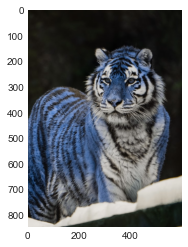

In [3]:
plt.style.use("seaborn-dark")
image = cv2.imread("images/pic1.jpg")
print(type(image))
print(image.shape)
plt.imshow(image)

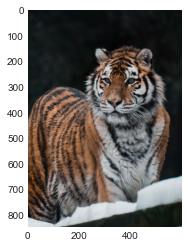

In [4]:
# This image is in BGR format as that is the way openCV reads images
# We'll convert it to RGB format:
true_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(true_image)
plt.show()

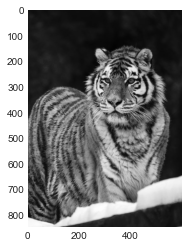

In [5]:
# So this is the image we want to extract colours from.
# grey image:
grey_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(grey_img,cmap='gray')
plt.show()

In [6]:
# Resizing the image:
#resized_img = cv2.resize(image,(1500,1000))
#plt.imshow(resized_img)
# plt.show()
#Not Needed here

### Color Identification

#### Converting RGB to HEX:
This is needed so as to use them as labels for our pie chart

In [7]:
#!pip install webcolors

In [8]:
# importing relevant files:
from webcolors import rgb_to_name,hex_to_name,hex_to_rgb
import webcolors
from sklearn.metrics import mean_squared_error

In [9]:
#Reading image in RGB color space
def get_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

In [10]:
# Extracting HEX code from RGB:
def rgb_to_hex(colour):
    return "#{:02x}{:02x}{:02x}".format(int(colour[0]),int(colour[1]),int(colour[2]))

In [11]:
# Converting hex code to colour name:
def hex_2_name(colour):
    h_colour= rgb_to_hex(colour)
    try:
        nm = hex_to_name(h_colour,spec = "css3")
    except ValueError as v_error:
        rms_list = []
        for img_clr , img_hex in webcolors.CSS2_NAMES_TO_HEX.items():
            cur_clr = hex_to_rgb(img_hex)
            root_mean_sq_error = np.sqrt(mean_squared_error(colour,cur_clr))
            rms_list.append(root_mean_sq_error)
        
        closest_colour = rms_list.index(min(rms_list))
        
        nm = list(webcolors.CSS2_NAMES_TO_HEX.items())[closest_colour][0]
    return nm

  We supply the path as the argument. First, we read the file using imread and then change its color
  space before returning it.

### Get Colours From Images:

In [12]:
# function to cluster the colours present in the image and plotting a pie chart
def colours(image,no_of_colours,show_chart):
    modified_image = cv2.resize(image,(220,220),interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
    clf = KMeans(n_clusters = no_of_colours)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    
    center_colours = clf.cluster_centers_
    # we'll get ordered colours by iterating through the keys
    ordered_colours = [center_colours[i] for i in counts.keys()]
    hex_colours = [rgb_to_hex(ordered_colours[i]) for i in counts.keys()]
    rgb_colours = [(ordered_colours[i]) for i in counts.keys()]
    names = [(hex_2_name(ordered_colours[i]),rgb_to_hex(ordered_colours[i])) for i in counts.keys()]
    
    if(show_chart):
        plt.figure(figsize=(12,15))
        plt.subplot(131)
        plt.imshow(image)
        plt.subplot(133)
        plt.pie(counts.values(),labels = names ,colors = hex_colours)
        plt.show()

    return rgb_colours

### Prediction on images

images/pic1.jpg


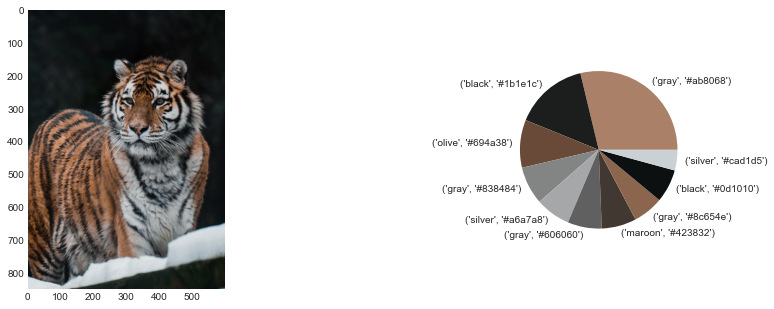

images/pic2.jpg


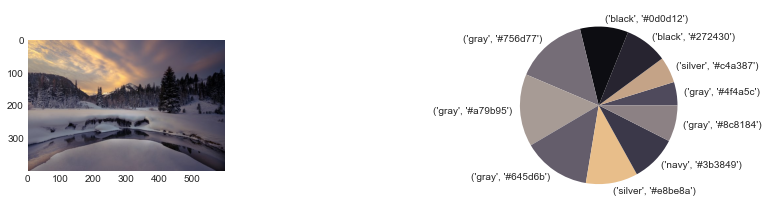

images/pic3.jpg


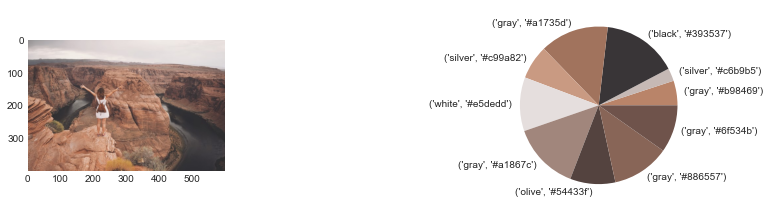

images/pic4.jpg


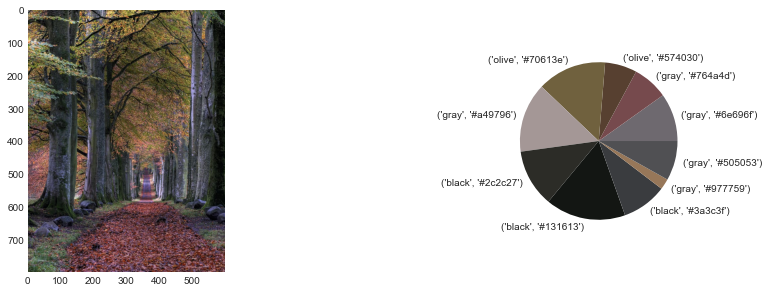

images/pic5.jpg


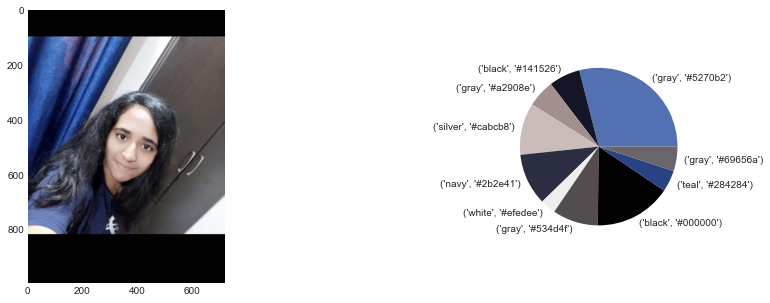

images/pic6.jpg


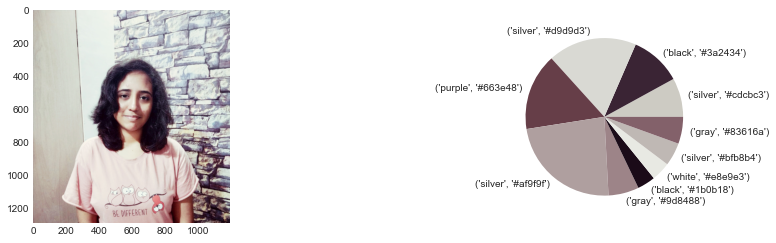

images/pic7.jpg


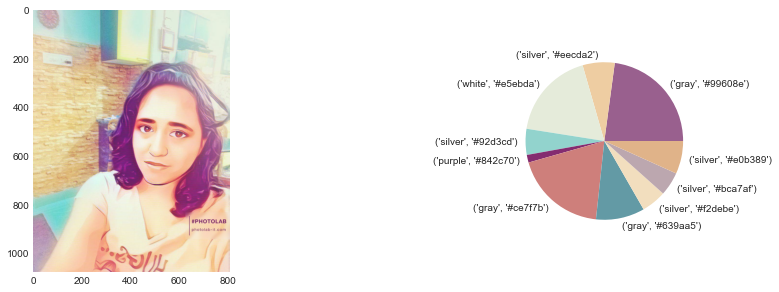

images/pic8.jpg


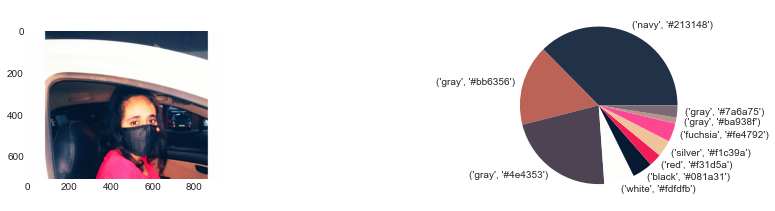

images/pic9.jpg


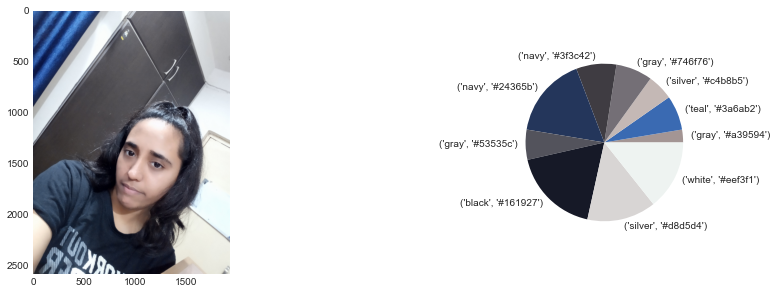

images/pic10.jpg


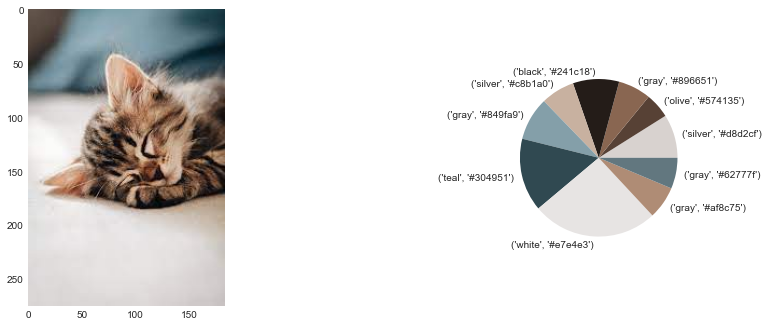

In [13]:
image1 = "images/pic1.jpg"
image2 = "images/pic2.jpg"
image3 = "images/pic3.jpg"
image4 = "images/pic4.jpg"
image5 = "images/pic5.jpg"
image6 = "images/pic6.jpg"
image7 = "images/pic7.jpg"
image8 = "images/pic8.jpg"
image9 = "images/pic9.jpg"
image10 = "images/pic10.jpg"

images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10]

for i in images:
    print(i)
    colours(get_img(i),10,True)
    

# Thank You !! 😇😄

Let's see the code on Github...